In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [34]:
rawData = pd.read_csv('skype_chat1.csv')

In [35]:
print(rawData)
print("(rows,columns):",rawData.shape)

                                             Flow ID           Src IP  \
0         131.202.240.185-131.202.243.255-137-137-17  131.202.240.185   
1         131.202.240.185-131.202.243.255-137-137-17  131.202.240.185   
2         131.202.240.185-131.202.243.255-137-137-17  131.202.240.185   
3         131.202.240.185-131.202.243.255-137-137-17  131.202.240.185   
4         131.202.240.185-131.202.243.255-137-137-17  131.202.240.185   
...                                              ...              ...   
3590       131.202.240.242-167.56.6.76-40509-38982-6  131.202.240.242   
3591  131.202.240.117-255.255.255.255-61251-10505-17  131.202.240.117   
3592     41.206.148.228-131.202.240.242-6132-40509-6   41.206.148.228   
3593       131.202.241.239-224.0.0.252-57247-5355-17  131.202.241.239   
3594       131.202.241.239-224.0.0.252-62818-5355-17  131.202.241.239   

      Src Port           Dst IP  Dst Port  Protocol               Timestamp  \
0          137  131.202.243.255       137   

In [44]:
# Get np array by columns
X = rawData.iloc[:,:86].values
Y = rawData.iloc[:,86].values.reshape((rawData.shape[0],1))
m = rawData.shape[0]
# Total length of flow in both direction
#X_total_length_flow = np.array(rawData.loc[:,['TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Mean','Bwd Pkt Len Mean','App_protocol','Web_service']])
#X_total_length_flow = np.array(rawData.loc[:,['Fwd Pkt Len Mean','Bwd Pkt Len Mean','Fwd Pkts/s','Bwd Pkts/s','Web_service']])

#215
#X_total_length_flow = np.array(rawData.loc[:,['Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Mean','Bwd Pkt Len Mean','Web_service']])

#X_total_length_flow = np.array(rawData.loc[:,['Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Mean','Bwd Pkt Len Mean','Web_service']])
X_flow_1 = np.array(rawData.loc[:,['Tot Fwd Pkts','Tot Bwd Pkts','flow_start','Flow Duration','Flow Byts/s','Flow Pkts/s']])

(3595, 6)


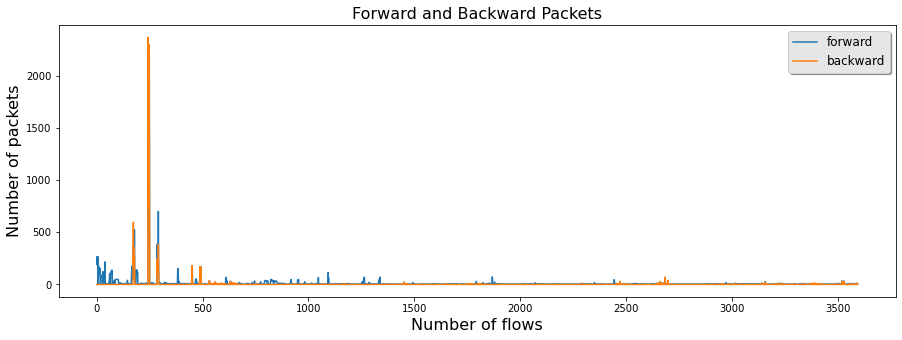

In [37]:
Xm = X_flow_1.shape[0]
Xn = X_flow_1.shape[1]
#X_flow_1 = X_flow_1[np.where((X_flow_1[:,0] < 50) & (X_flow_1[:,1] < 50))]
print(X_flow_1.shape)
flow = ['forward','backward']
fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_flow_1[:,i],label= flow[i])
    
plt.ylabel('Number of packets',fontsize=16)
plt.xlabel('Number of flows',fontsize=16)
plt.title('Forward and Backward Packets',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [38]:
print("{:0.2f}% backward flow send packets".format((len(X_flow_1[np.where(X_flow_1[:,1] != 0)]) / X_flow_1.shape[0])*100))
print("{:0.2f}% forward flow send packets".format((len(X_flow_1[np.where(X_flow_1[:,0] != 0)]) / X_flow_1.shape[0])*100))
print("the number of packets are sent by most forward flows tend to be around 2 to 8")

9.62% backward flow send packets
100.00% forward flow send packets
the number of packets are sent by most forward flows tend to be around 2 to 8


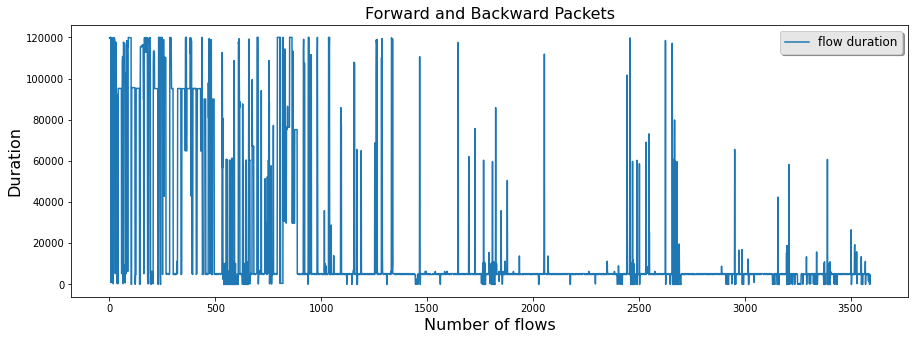

In [39]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(X_flow_1[:,3] / 1000, label='flow duration')
    
plt.ylabel('Duration',fontsize=16)
plt.xlabel('Number of flows',fontsize=16)
plt.title('Forward and Backward Packets',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

No handles with labels found to put in legend.


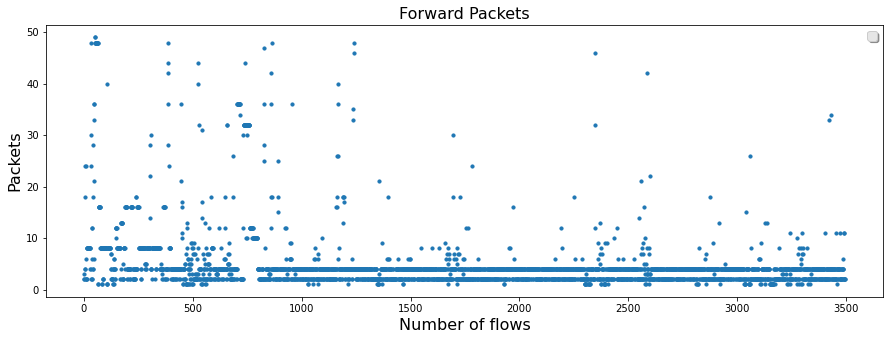

In [45]:
X_flow_ForwardPkt = X_flow_1[np.where(X_flow_1[:,0] < 50)]
fig, ax = plt.subplots(figsize=(15,5))

plt.scatter(np.arange(X_flow_ForwardPkt.shape[0]),X_flow_ForwardPkt[:,0],s=10)
    
plt.ylabel('Packets',fontsize=16)
plt.xlabel('Number of flows',fontsize=16)
plt.title('Forward Packets',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

No handles with labels found to put in legend.


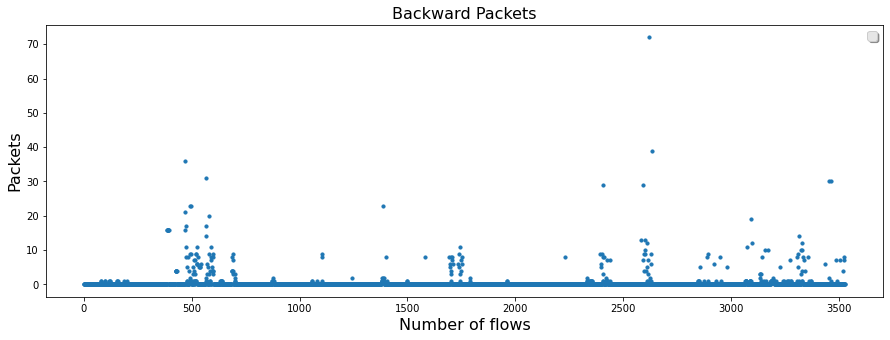

In [46]:
X_flow_backwardPkt = X_flow_1[np.where(X_flow_1[:,0] < 100)]
fig, ax = plt.subplots(figsize=(15,5))

plt.scatter(np.arange(X_flow_backwardPkt.shape[0]),X_flow_backwardPkt[:,1],s=10)
    
plt.ylabel('Packets',fontsize=16)
plt.xlabel('Number of flows',fontsize=16)
plt.title('Backward Packets',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()